# Neural Network for inpainting one pixel an image using tensorflow 1

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib as plt
from data_generators import gen_frm_pic
from util_functions import util_functions

INDEX_TRGT = 12
INDEX_END = 24
ROW_SHAPE = (1,25)

Instructions for updating:
non-resource variables are not supported in the long term


## Generate images data

In [35]:
data,data_test = gen_frm_pic.generate_5()
# print(data_test[0])
print(data[0][0])

[[ 89  68  21]
 [ 98  77  30]
 [105  84  39]
 [104  85  42]
 [105  86  43]]


## Split each pixel data to RGB channels

In [3]:
# red channel data
r_data = []

# green channel data
g_data = []

# blue channel data
b_data = []


for image in data:
    
    r_temp=[]
    b_temp=[]
    g_temp=[]
    for i in range(5):
        for j in range(5):
            r_temp.append(image[i][j][0])
            b_temp.append(image[i][j][1])
            g_temp.append(image[i][j][2])
    r_array=np.asarray(r_temp)
    g_array=np.asarray(r_temp)
    b_array=np.asarray(r_temp)
    util_functions.swap(r_array,INDEX_TRGT,INDEX_END)
    util_functions.swap(g_array,INDEX_TRGT,INDEX_END)
    util_functions.swap(b_array,INDEX_TRGT,INDEX_END)
    r_data.append(r_array)
    g_data.append(g_array)
    b_data.append(b_array)
    
r_test = []
g_test = []
b_test = []
for image in data_test:
    r_temp=[]
    b_temp=[]
    g_temp=[]
    for i in range(5):
        for j in range(5):
            r_temp.append(image[i][j][0])
            b_temp.append(image[i][j][1])
            g_temp.append(image[i][j][2])
    r_array=np.asarray(r_temp)
    g_array=np.asarray(r_temp)
    b_array=np.asarray(r_temp)
    util_functions.swap(r_array,INDEX_TRGT,INDEX_END)
    util_functions.swap(g_array,INDEX_TRGT,INDEX_END)
    util_functions.swap(b_array,INDEX_TRGT,INDEX_END)
    r_test.append(r_array)
    g_test.append(g_array)
    b_test.append(b_array)
    
data = [r_data, g_data, b_data]
test = [r_test, g_test, b_test]


## Split data to train, test and vailation data

In [4]:


x_train_r = []
y_train_r = []

x_test_r = []
x_test_g = []
x_test_b = []

y_test_r = []
y_test_g = []
y_test_b = []

for i in range(len(r_data)):
    x_train_r.append(r_data[i][0:INDEX_END].tolist())
    y_train_r.append([r_data[i][INDEX_END]])

for i in range(len(r_test)):
    
    x_test_r.append(r_test[i][0:INDEX_END].tolist())
    x_test_g.append(g_test[i][0:INDEX_END].tolist())
    x_test_b.append(b_test[i][0:INDEX_END].tolist())

    y_test_r.append([r_test[i][INDEX_END]])
    y_test_g.append([g_test[i][INDEX_END]])
    y_test_b.append([b_test[i][INDEX_END]])


x_testers = [x_test_r,x_test_g,x_test_b]
y_testers = [y_test_r,y_test_g,y_test_b]

In [5]:
x_train_r[1]

[104,
 93,
 80,
 82,
 75,
 97,
 95,
 92,
 88,
 81,
 91,
 93,
 87,
 95,
 89,
 87,
 87,
 88,
 96,
 91,
 82,
 84,
 87,
 94]

## Model

In [6]:
features = 24 # each pixel
hidden_layer_nodes = 16
loss_plot = []
test_plot = []
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W1 = tf.Variable(tf.truncated_normal([features, hidden_layer_nodes]))
b1 = tf.Variable(tf.constant(0.1, shape=[hidden_layer_nodes]))
z1 = tf.add(tf.matmul(x,W1),b1)
a1 = tf.nn.relu(z1) # using relu function
W2 = tf.Variable(tf.truncated_normal([hidden_layer_nodes,1]))
b2 = tf.Variable(0.)
z2 = tf.matmul(a1,W2) + b2
st_w = []
nd_w = []

loss = tf.reduce_mean(tf.pow(z2 - y_, 2))
update = tf.train.AdamOptimizer(0.001).minimize(loss) # using adam optimizer

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(0,10000):
        sess.run(update, feed_dict = {x:x_train_r, y_:y_train_r})
        st_w.append(sess.run(W1))
        nd_w.append(sess.run(W2))
#         loss_plot.append(loss.eval(session=sess, feed_dict = {x:x_train_r, y_:y_train_r}))
#         test_plot.append(loss.eval(session=sess,feed_dict = {x:x_testers[0],y_:y_testers[0]}))

In [7]:
print(np.sqrt(loss.eval(session=sess, feed_dict = {x:x_train_r, y_:y_train_r})))

3.912907


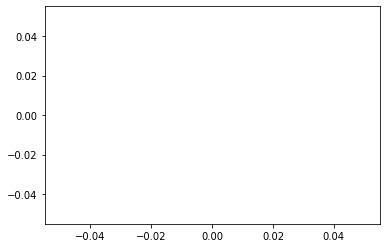

first layer weights over time

[ 0.6458078  -1.6105723   1.6243376  -0.45313388 -1.0455402  -1.0087045
 -1.418447   -0.13969998  0.83939123 -1.203666    0.35891354  0.18061507
  0.38902748  0.08202568  1.1483005  -0.2130314  -1.4496152   1.5345676
  0.68369097 -0.5662077  -0.7569122  -0.4635392  -0.08979792  0.63165027]


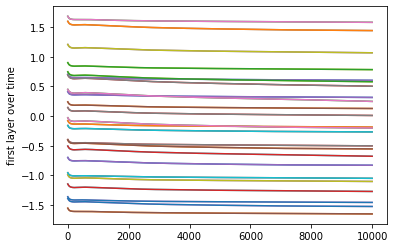

In [9]:
d = np.array(np.array(st_w).transpose()[0]).transpose()
print(d[900])
plt.pyplot.plot(d)
plt.pyplot.ylabel('first layer over time')
plt.pyplot.plot(d)

[ 0.350817    1.8574142  -0.24823491 -1.9555566   0.64207417  0.5498483
 -0.00724694  0.70345604 -0.37735432 -1.3782353   0.6473259  -0.03658207
  2.140557    1.0461307  -0.18031983 -0.05804102]


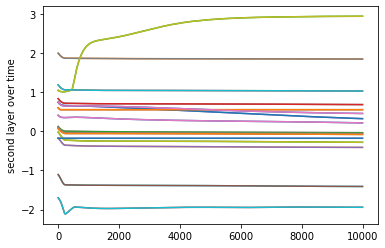

In [10]:
d = np.array(np.array(nd_w).transpose()[0]).transpose()
print(d[900])
plt.pyplot.plot(d)
plt.pyplot.ylabel('second layer over time')
plt.pyplot.plot(d)

In [11]:
# test_x_r = []
# test_y_r = []
# for i in range(len(test_r_data)):
#     test_x_r.append(test_r_data[i][0:INDEX_END].tolist())
#     test_y_r.append([test_r_data[i][INDEX_END].tolist()])
# test_x_g = []
# test_y_g = []
# for i in range(len(test_g_data)):
#     test_x_g.append(test_g_data[i][0:INDEX_END].tolist())
#     test_y_g.append([test_g_data[i][INDEX_END].tolist()])
# test_x_b = []
# test_y_b = []
# for i in range(len(test_g_data)):
#     test_x_b.append(test_b_data[i][0:INDEX_END].tolist())
#     test_y_b.append([test_b_data[i][INDEX_END].tolist()])
    
print("sqaured test error on the red channel:", np.sqrt(loss.eval(session=sess, feed_dict = {x:x_testers[0], y_:y_testers[0]})))
print("sqaured test error on the red channel:", np.sqrt(loss.eval(session=sess, feed_dict = {x:x_testers[1], y_:y_testers[1]})))
print("sqaured test error on the red channel:", np.sqrt(loss.eval(session=sess, feed_dict = {x:x_testers[2], y_:y_testers[2]})))

sqaured test error on the red channel: 6.5161524
sqaured test error on the red channel: 6.5161524
sqaured test error on the red channel: 6.5161524


In [12]:
# x_testers[0][0] 
# x_testers[1][0] 
# x_testers[2][0]

arr_r = np.asarray(x_testers[0])
arr_g =  np.asarray(x_testers[1])
arr_b =  np.asarray(x_testers[2])
p_r = sess.run(tf.nn.relu(z2),feed_dict={x:arr_r})
p_g = sess.run(tf.nn.relu(z2),feed_dict={x:arr_g})
p_b = sess.run(tf.nn.relu(z2),feed_dict={x:arr_b})


In [26]:
matrices = []
for i in range(len(arr_r)):
    temp_r = arr_r[i].tolist()
    temp_g = arr_g[i].tolist()
    temp_b = arr_b[i].tolist()
    temp_r.append(int(p_r[i][0]))
    temp_g.append(int(p_g[i][0]))
    temp_b.append(int(p_b[i][0]))
    util_functions.swap(temp_r,INDEX_TRGT,INDEX_END)
    util_functions.swap(temp_g,INDEX_TRGT,INDEX_END)
    util_functions.swap(temp_b,INDEX_TRGT,INDEX_END)
    temp_r = np.reshape(np.asarray(temp_r,np.uint8),(5,5))
    temp_g = np.reshape(np.asarray(temp_r,np.uint8),(5,5))
    temp_b = np.reshape(np.asarray(temp_r,np.uint8),(5,5))
    matrix = np.asarray([temp_r,temp_g,temp_b])
    matrices.append(matrix)
print(len(matrices))
print(matrices[0][0])

6400
[[ 42  35  29  32  46]
 [103  77  45  27  36]
 [185 164 134 113  65]
 [186 191 182 176 186]
 [168 167 172 186 197]]


In [25]:
from PIL import Image as mg


data = matrices
i = 0
lines = []
# i += 1
size = len(data[0][0])
print(len(data))

for _ in range(0, data_size, size):
    concat = data[i]
    for _ in range(1, data_size, size):
        print(i)
        pixel = data[i]
        concat = np.concatenate((concat, pixel), axis=1)
        i += 1
    lines.append(concat)

concat = lines[0]
for i in range(1, len(lines)):
    concat = np.concatenate((concat, lines[i]), axis=0)



im = mg.fromarray(concat,'RGB')
im.save("output_image_neural_network.jpeg")

6400
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769


4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744
4745
4746
4747
4748
4749
4750
4751
4752
4753
4754
4755
4756
4757
4758
4759
4760
4761
4762
4763
4764
4765
4766
4767
4768
4769
4770
4771
4772
4773
4774
4775
4776
4777
4778
4779
4780
4781
4782
4783
4784
4785
4786
4787
4788
4789
4790
4791
4792
4793
4794
4795
4796
4797
4798
4799
4800
4801
4802
4803
4804
4805
4806
4807
4808
4809
4810
4811
4812
4813
4814
